# Data Visualization part

In [62]:
#import important libraries
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [63]:
#get the csv to be used
bdata = pd.read_csv('/content/CSEdata (1).csv')
bdata.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [64]:
#checking for null values
bdata.isnull().sum()


,0
Id,0
Income,0
Age,0
Experience,0
Married/Single,0
House_Ownership,0
Car_Ownership,0
Profession,0
CITY,0
STATE,0


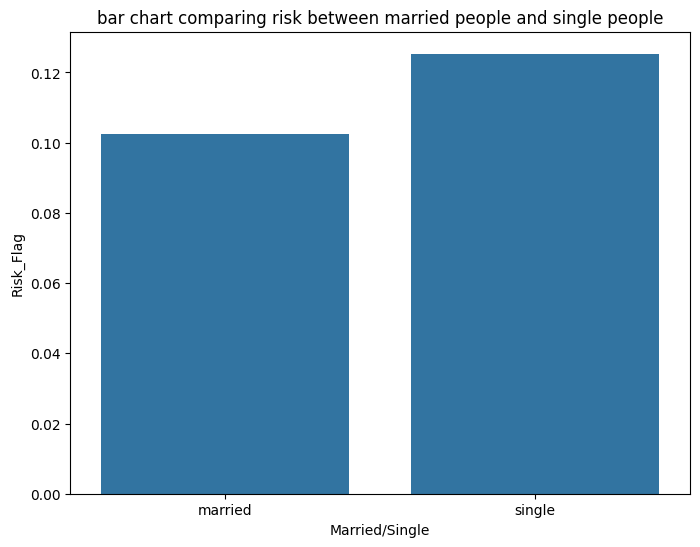

In [65]:
#comparing risk between married people and single people
ms = bdata.groupby("Married/Single")["Risk_Flag"].mean()
plt.figure(figsize=(8,6))
plt.title('bar chart comparing risk between married people and single people')
sns.barplot(data = ms)

plt.show()

Single people are more likely to default than married couples


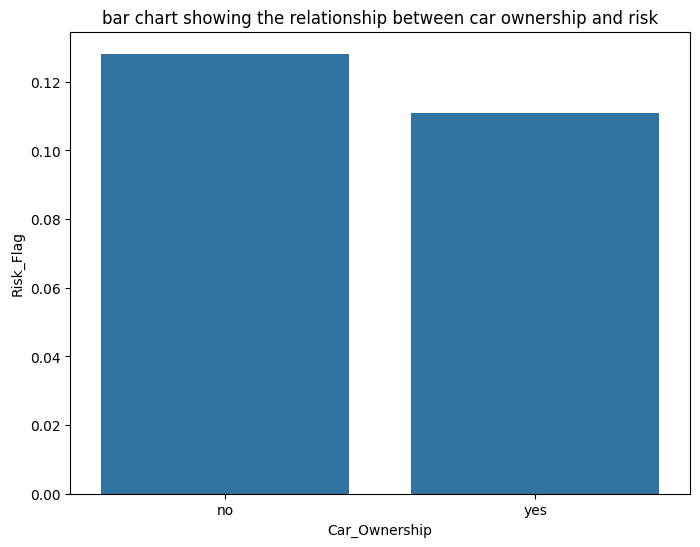

In [66]:
#Looking for the relationship between car ownership and risk
co = bdata.groupby("Car_Ownership")["Risk_Flag"].mean()
plt.figure(figsize=(8,6))
plt.title('bar chart showing the relationship between car ownership and risk')
sns.barplot(data = co)

plt.show()

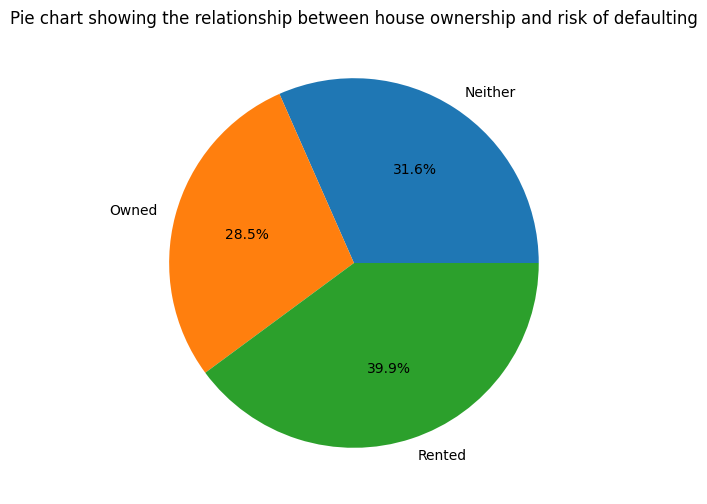

In [67]:
#Looking for the relationship between house ownership and risk of defaulting
ho = bdata.groupby("House_Ownership")["Risk_Flag"].mean()
labia = ['Neither','Owned','Rented']
plt.figure(figsize=(8,6))
plt.title('Pie chart showing the relationship between house ownership and risk of defaulting')
plt.pie(ho, labels = labia, autopct="%1.1f%%")

plt.show()

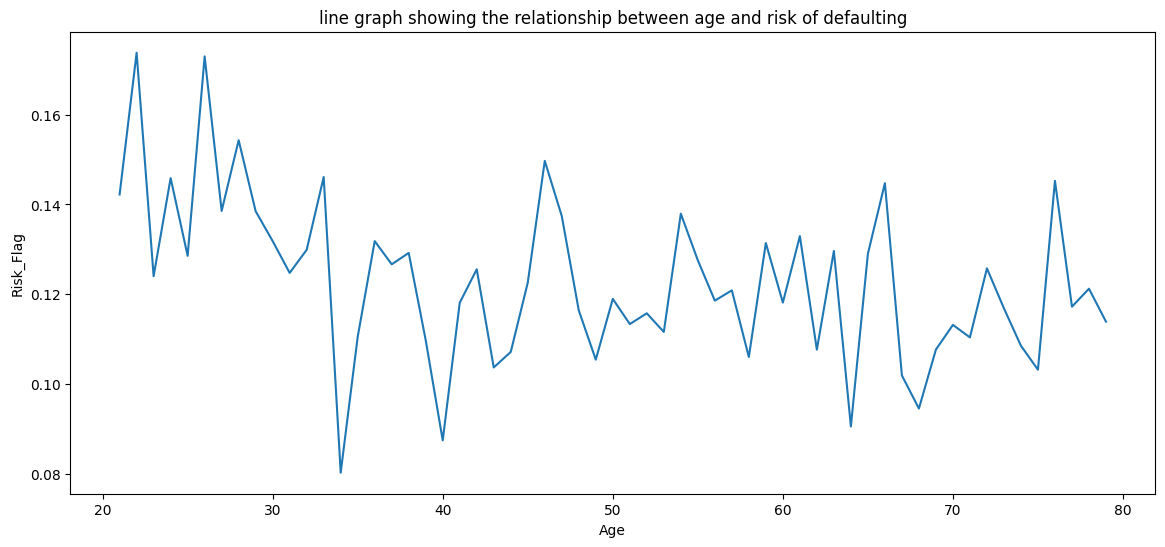

In [68]:
#Determining the relationship between age and risk of defaulting

a = bdata.groupby("Age")["Risk_Flag"].mean()
plt.figure(figsize=(14,6))
plt.title('line graph showing the relationship between age and risk of defaulting')
sns.lineplot(data = a)

plt.show()

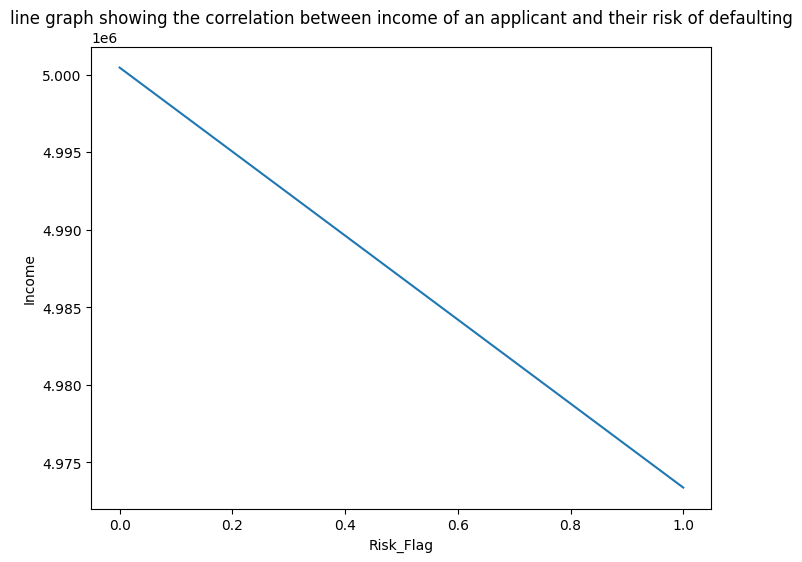

In [69]:
#Comparing the correlation between income of an applicant and their risk of defaulting
inc = bdata.groupby("Risk_Flag")["Income"].mean()
plt.figure(figsize=(8,6))
plt.title('line graph showing the correlation between income of an applicant and their risk of defaulting')
sns.lineplot(data = inc)

plt.show()

The risk of defaulting increases the lower the income is

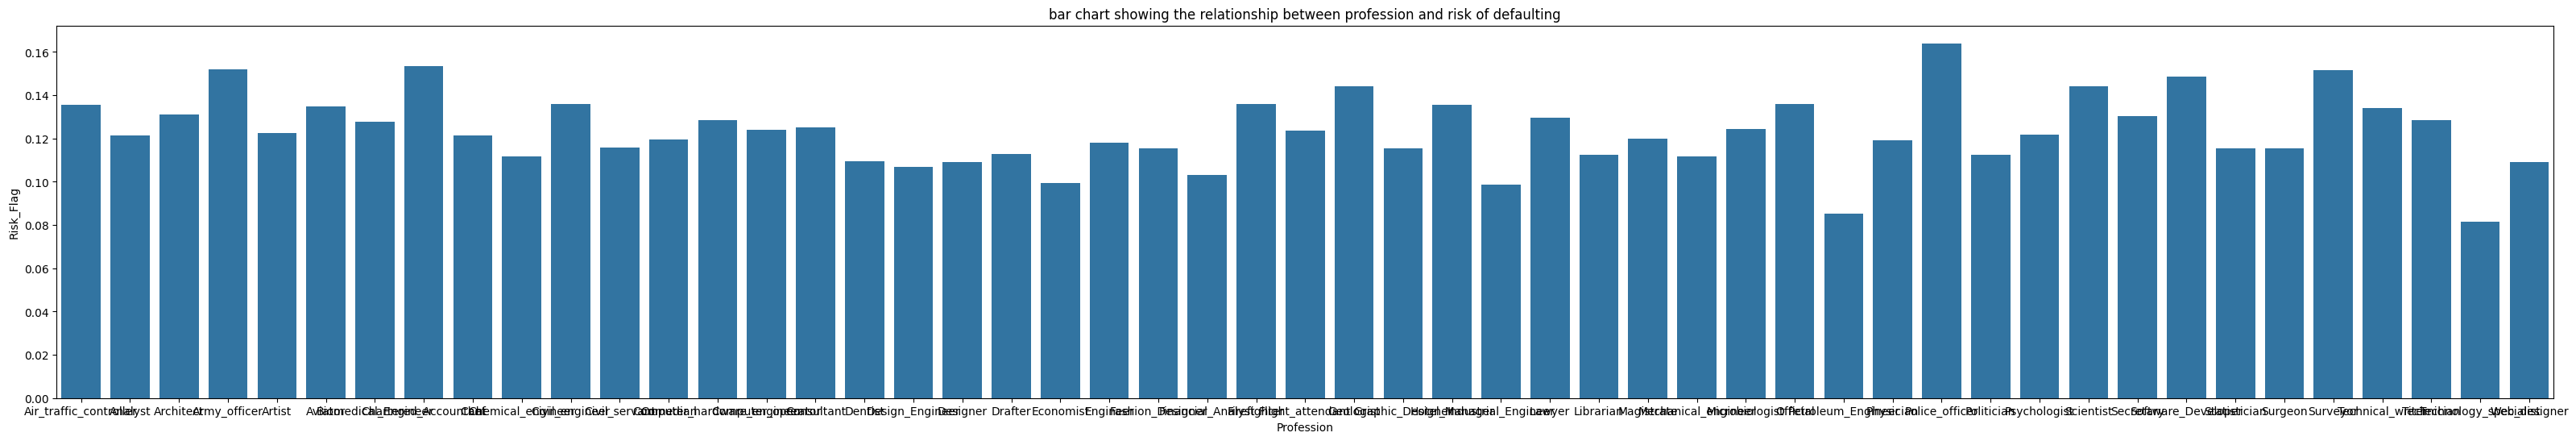

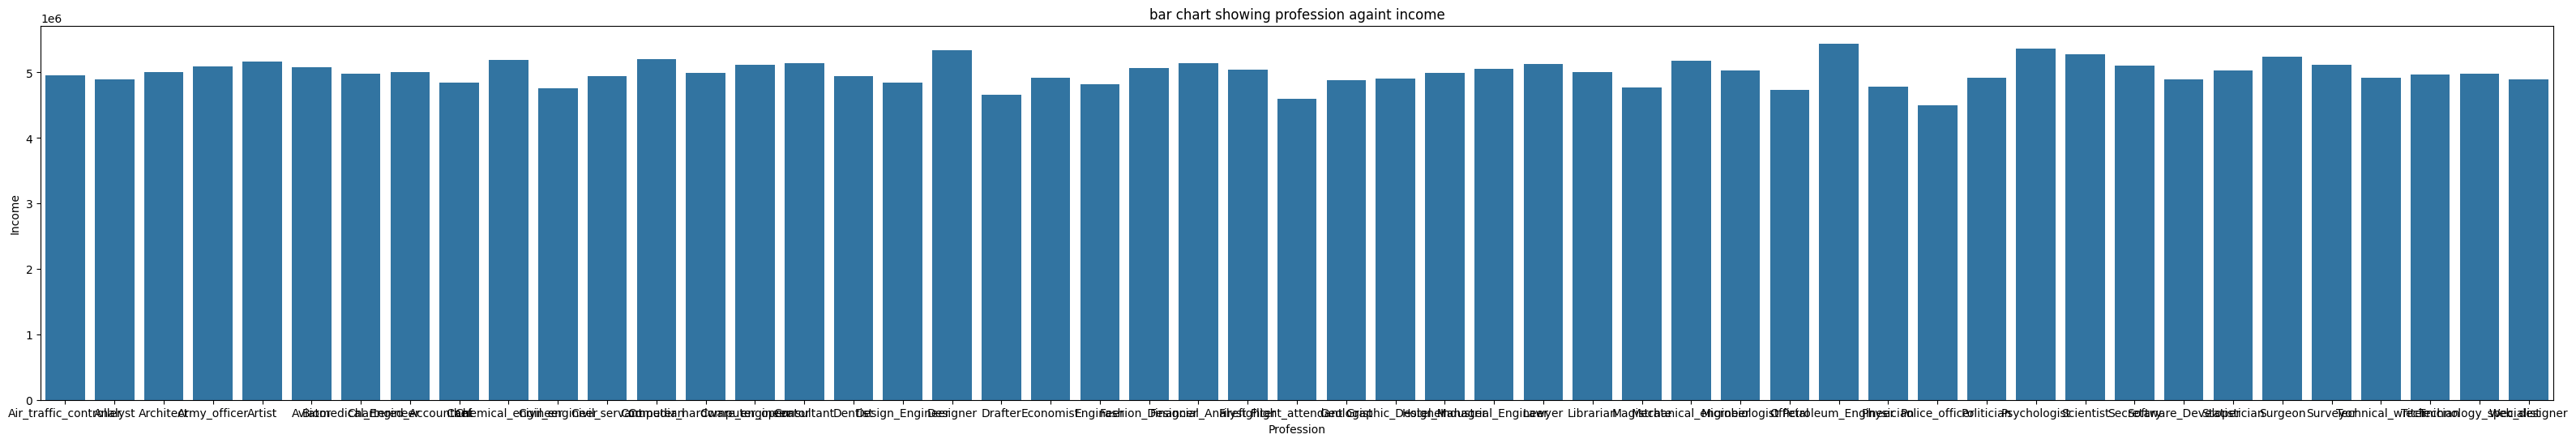

In [70]:
#Determining the relationship between profession and risk of defaulting
pf = bdata.groupby("Profession")["Risk_Flag"].mean()
plt.figure(figsize=(40,6))
plt.title('bar chart showing the relationship between profession and risk of defaulting')
sns.barplot(data = pf)

plt.show()

pf = bdata.groupby("Profession")["Income"].mean()
plt.figure(figsize=(40,6))
plt.title('bar chart showing profession againt income')

sns.barplot(data = pf)

plt.show()

Some proffesions such as petroleum engineer have a lower default risk

From the data it is most likely becuase of the higher income seeing as petrolem engineering is one of the highest paying professions and is simultaneously the proffesion with the lowest risk

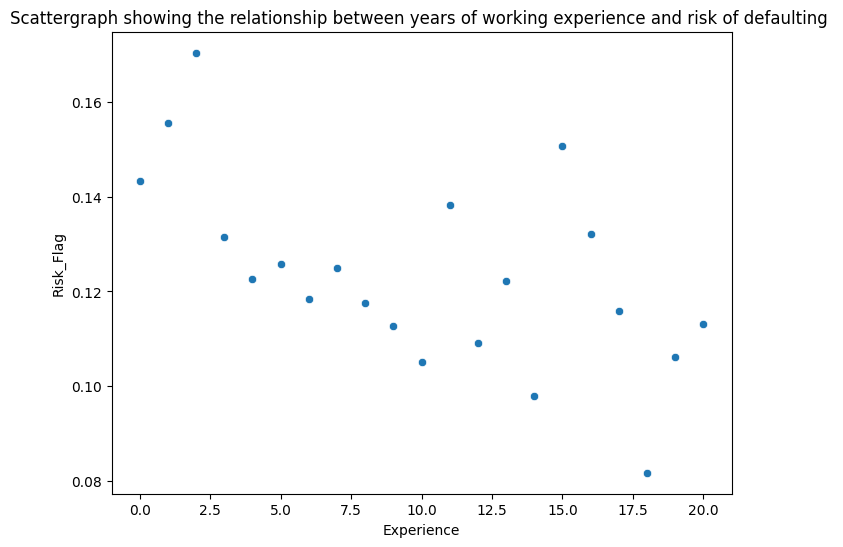

In [71]:
#Determining the relationship between years of working experience and risk of defaulting

exp = bdata.groupby("Experience")["Risk_Flag"].mean()
exp2 = exp.to_frame
plt.figure(figsize=(8,6))
plt.title('Scattergraph showing the relationship between years of working experience and risk of defaulting ')
sns.scatterplot(data = exp )
plt.show()

Generally, the more work experience an applicant has the less likely they are to default

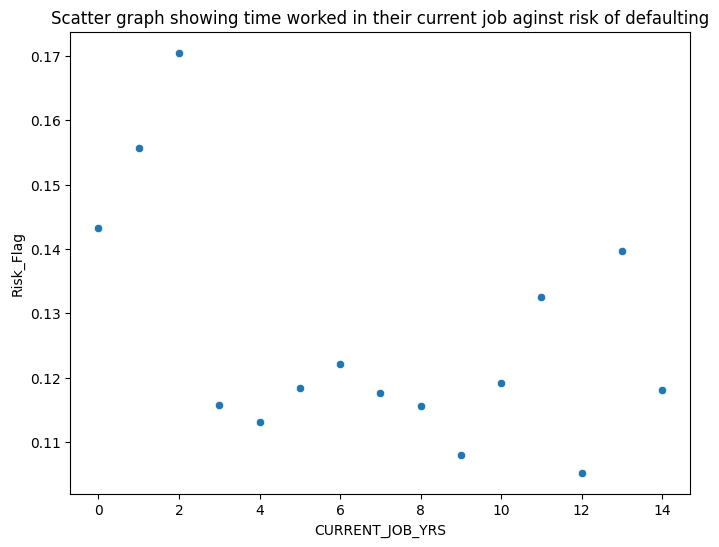

In [72]:
#Determining the relationship between the amount of time a person has been working at their current job and risk of defaulting

cjy = bdata.groupby("CURRENT_JOB_YRS")["Risk_Flag"].mean()
plt.figure(figsize=(8,6))
plt.title('Scatter graph showing time worked in their current job aginst risk of defaulting')
sns.scatterplot(data = cjy)
plt.show()

People with a small amount of time in one paricular job seem to default more but this correlation is weaker compared to the previous 'experience againt risk' graphd


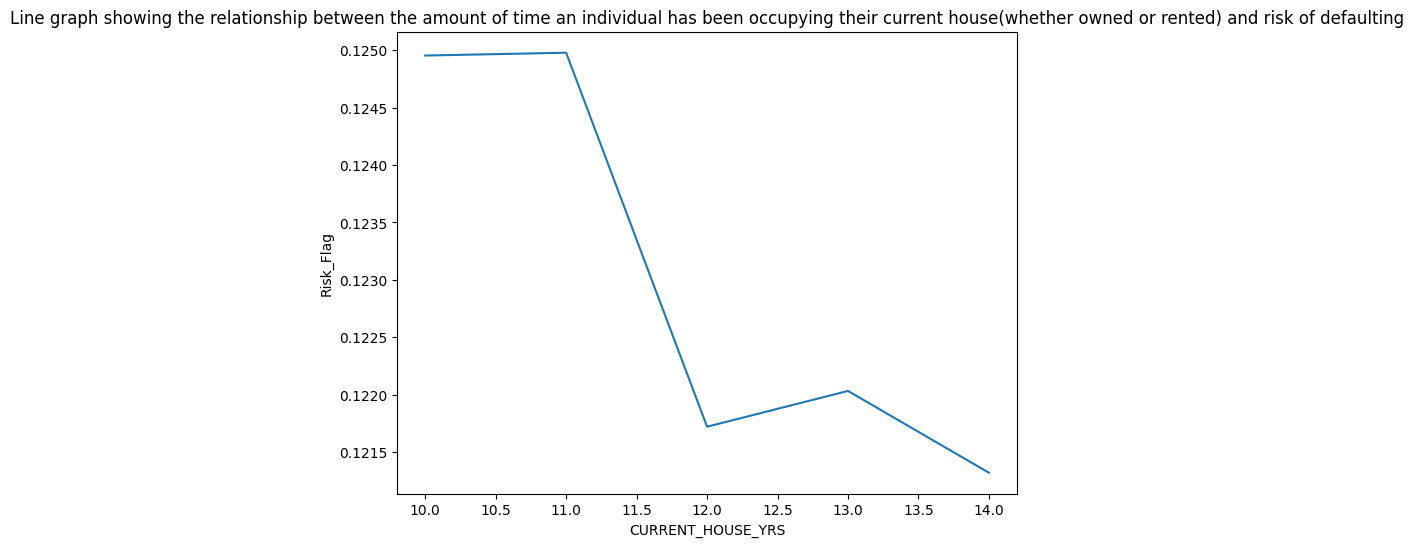

In [73]:
#Determining the relationship between the amount of time an individual has been occupying their current house(whether owned or rented) and risk of defaulting

chy = bdata.groupby("CURRENT_HOUSE_YRS")["Risk_Flag"].mean()
plt.figure(figsize=(8,6))
plt.title("Line graph showing the relationship between the amount of time an individual has been occupying their current house(whether owned or rented) and risk of defaulting")
sns.lineplot(data = chy)

plt.show()

Theres is a decrease in risk with an in risk the longer an applicant has spent in a single house
Especially after the eleven year mark


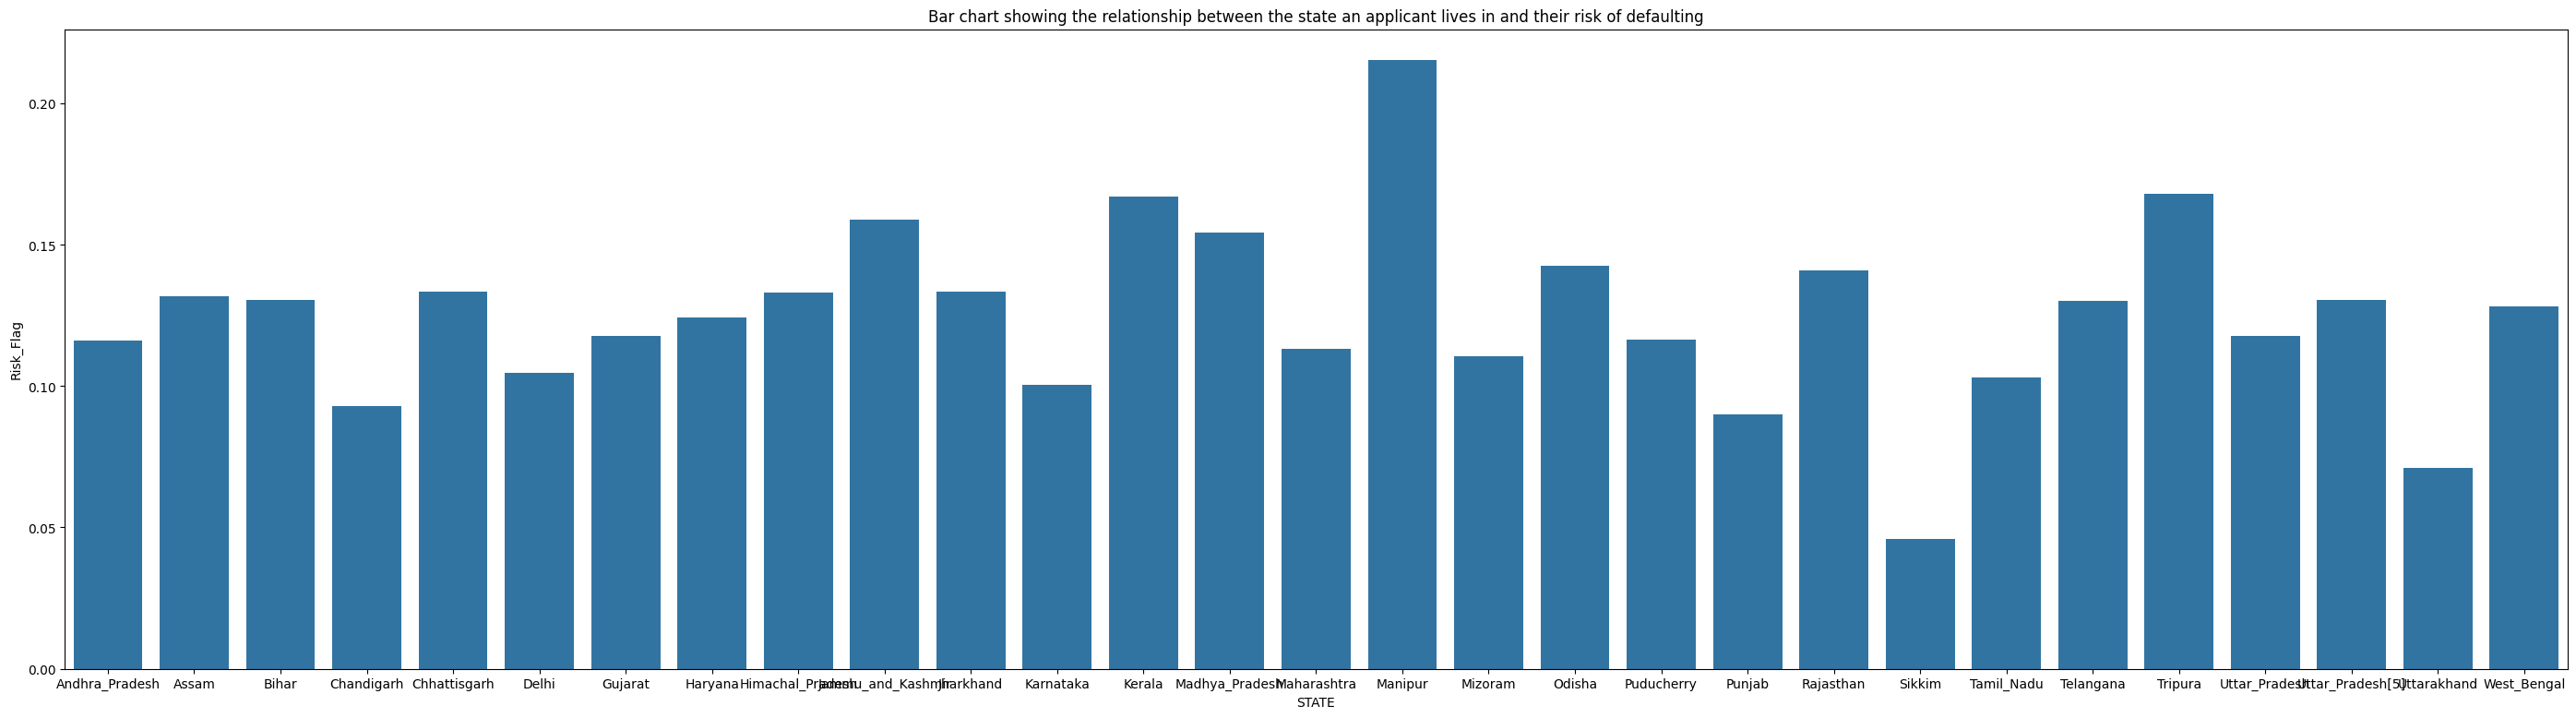

In [74]:
#Determining the relationship between the state an applicant lives in and their risk of defaulting

st = bdata.groupby("STATE")["Risk_Flag"].mean()
plt.figure(figsize=(35,9))
plt.title('Bar chart showing the relationship between the state an applicant lives in and their risk of defaulting')
sns.barplot(data = st)
plt.show()

Defaulting is more likely in some states than in others for example Manipur which has the highest default rate

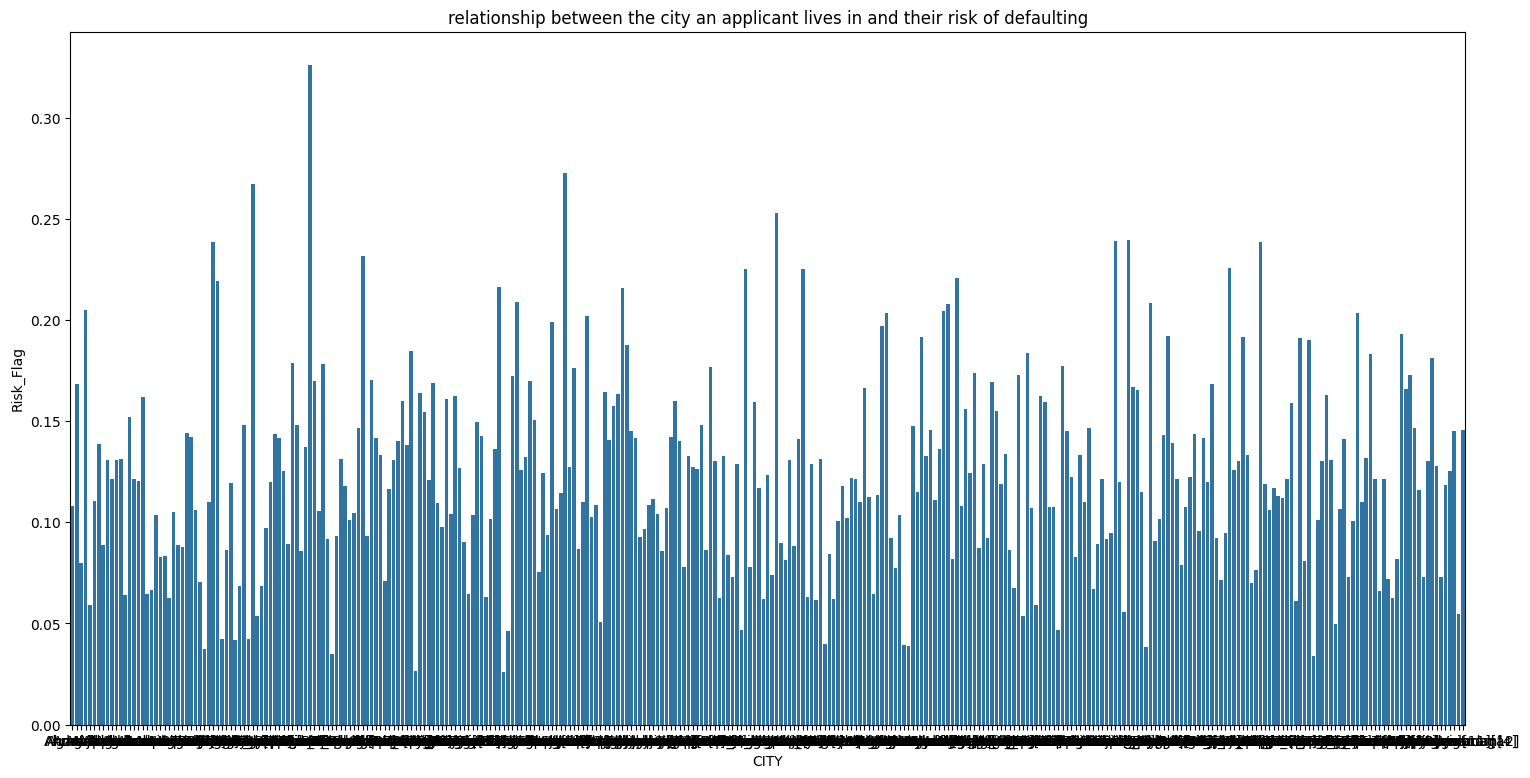

In [75]:
#Determining the relationship between the city an applicant lives in and their risk of defaulting

ct = bdata.groupby("CITY")["Risk_Flag"].mean()
plt.figure(figsize=(18,9))
plt.title('relationship between the city an applicant lives in and their risk of defaulting')
sns.barplot(data = ct)

plt.show()

# Machine Learning Part

In [76]:
#We once again im port our necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder


In [77]:

le_col4 = LabelEncoder()
le_col5 = LabelEncoder()
le_col6 = LabelEncoder()
le_col7 = LabelEncoder()
le_col8 = LabelEncoder()
le_col9 = LabelEncoder()

In [78]:
ecol4 = le_col4.fit_transform(bdata['Married/Single'])
ecol5 = le_col5.fit_transform(bdata['House_Ownership'])
ecol6 = le_col6.fit_transform(bdata['Car_Ownership'])
ecol7 = le_col7.fit_transform(bdata['Profession'])
ecol8 = le_col8.fit_transform(bdata['CITY'])
ecol9 = le_col9.fit_transform(bdata['STATE'])


In [79]:
# define which are to be used as features
FE = pd.DataFrame({'c1' : bdata['Income'],'c2' : bdata['Age'],'c3' :bdata['Experience'],'c4' : ecol4,'c5' : ecol5,'c6' : ecol6,'c7' : ecol7,'c8' : ecol8,'c9' : ecol9,})


# and which column is our target variable(The variable we are aiming to predict)
TV = bdata['Risk_Flag']

In [80]:
FE_train, FE_test, TV_train, TV_test = train_test_split(FE, TV, test_size=0.2, random_state=42)

In [81]:
# Create a logistic regression model instance
model = LogisticRegression(solver="lbfgs")

# Train the model using the input features (FE) and target variable (TV)
model.fit(FE_train, TV_train)

LogisticRegression()

In [82]:
# Evaluate model accuracy on the test set
from sklearn.metrics import accuracy_score

TV_pred = model.predict(FE_test)
accuracy = accuracy_score(TV_test, TV_pred)
print("Model accuracy on test set:", accuracy)

Model accuracy on test set: 0.8759325396825397
